# Forelesning 7: Differensiallikninger

Først: Repetisjon (https://www.mentimeter.com/app/presentation/d40d75447a668832c566597595f84042/71640270cf82/edit)

$$y' = y + t$$

$$f'(t) = f(y, t)$$


## Fra makronivå...

### Fallende ambolt

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Konstanter
m = 30  # masse i kg
g = 9.8 # gravitasjonskonstanten i m/s^2
k = 1  # luftmotstandstallet

s = 0     # Startposisjon
v = 0     # Startfart (m/s)
tid = 0   # Starttid (s)
dt = 1E-3 # Tidssteg
s_slutt = 15

while s < s_slutt:
    F = m*g - k*v  # Uttrykk for kreftene
    a = F/m        # Bruker N2 til å regne ut a
    v = v + a*dt   # Bruker kinematikklikningene til å regne ut v og s
    s = s + v*dt
    tid = tid + dt

print(tid)

1.7669999999999162


__Oppgave:__ Gjør om programmet slik at det benytter arrayer istedenfor lister

## ...til mikronivå

### En bindingsmodell

Vi kan lage bindingsmodeller som enkle "fjærmodeller". Da ser vi på atomene som kuler som henger i hver sin ende av en fjær. Dersom fjæra er stiv (høy "fjærkonstant"), vibrerer atomene mye, og motsatt. Enkle fjærkrefter følger Hooks lov:

$$F = -k\cdot (x - x_{eq})$$

der _x_ er posisjonen og $x_0$ er likevektsposisjonen, dvs. posisjonen der fjæra ikke er komprimert eller strukket ut.

In [22]:
# Konstanter
m = 1
x_eq = 0 
k = 0.01    # Fjærkrafttallet

# Startbetingelser
t0 = 0
v0 = 0
x0 = 1

# Tid
tid_slutt = 1000
dt = 1E-3
N = int((tid_slutt - t0)/dt + 1)

# Arrayer
t = np.zeros(N)
v = np.zeros(N)
x = np.zeros(N)

t[0] = t0
v[0] = v0
x[0] = x0

for i in range(N-1):
    F = -k*(x[i] - x_eq)
    a = F/m
    v[i+1] = v[i] + a*dt
    x[i+1] = x[i] + v[i+1]*dt # Euler-Cromers metode
    t[i+1] = t[i] + dt

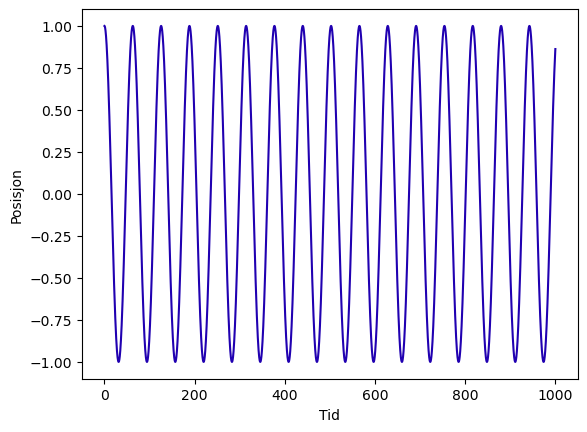

In [23]:
plt.plot(t, x, color = "xkcd:ultramarine")
plt.xlabel("Tid")
plt.ylabel("Posisjon")
plt.show()